# EDA

In [57]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('social_marketing.csv')

# List of columns to drop
columns_to_drop = ['chatter', 'uncategorized', 'spam', 'adult']

# Drop the specified columns
df = df.drop(columns_to_drop, axis=1)

# Display the first few rows of the dataset
print(df.head())

  Unnamed: 0  current_events  travel  photo_sharing  tv_film  sports_fandom  \
0  hmjoe4g3k               0       2              2        1              1   
1  clk1m5w8s               3       2              1        1              4   
2  jcsovtak3               3       4              3        5              0   
3  3oeb4hiln               5       2              2        1              0   
4  fd75x1vgk               2       0              6        0              0   

   politics  food  family  home_and_garden  music  news  online_gaming  \
0         0     4       1                2      0     0              0   
1         1     2       2                1      0     0              0   
2         2     1       1                1      1     1              0   
3         1     0       1                0      0     0              0   
4         2     0       1                0      0     0              3   

   shopping  health_nutrition  college_uni  sports_playing  cooking  eco  \
0   

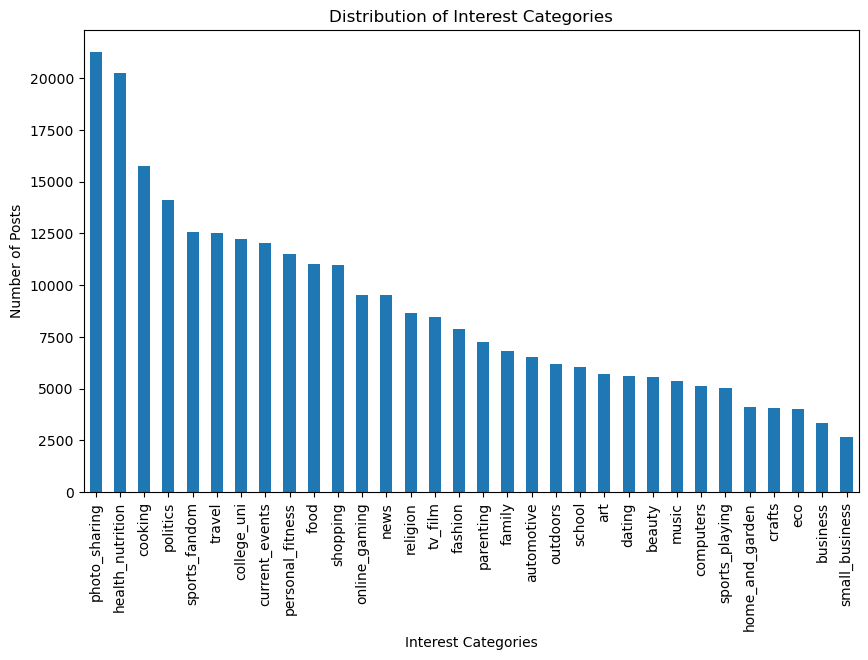

In [58]:
# Explore the distribution of interest categories
interest_columns = df.columns[1:]  # Exclude the first column (user IDs)
interest_counts = df[interest_columns].sum()

# Plot the distribution of interest categories
plt.figure(figsize=(10, 6))
interest_counts.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Interest Categories')
plt.ylabel('Number of Posts')
plt.title('Distribution of Interest Categories')
plt.xticks(rotation=90)
plt.show()

Some of the top interests from the followers' tweets are: photo sharing, health/nutrition, cooking, and politics. Obviously, by looking at just some of the top keywords, it's hard to tell if there are any clusters or distinctions between possible segments.

# Elbow Method for Optimal Clusters

/Users/choi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/choi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/choi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/choi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/choi/anaconda3/li

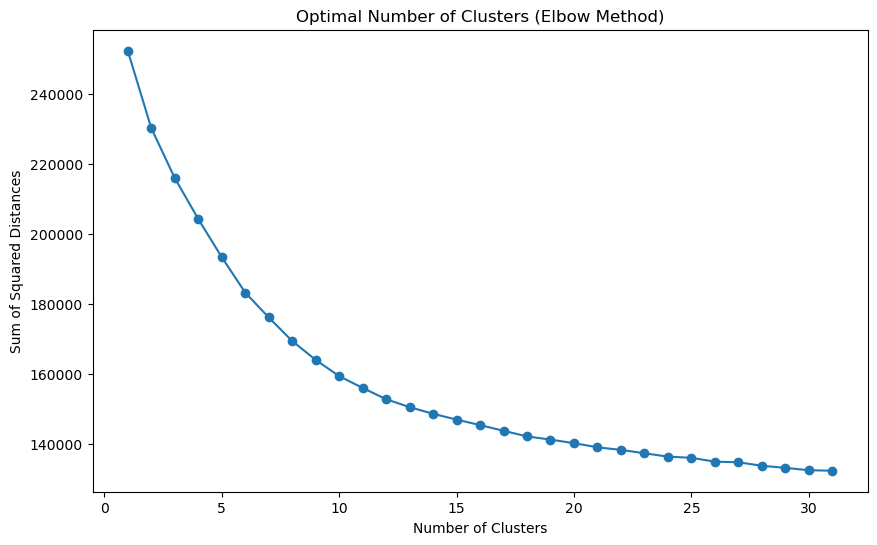

In [59]:
from sklearn.preprocessing import StandardScaler

# Select only the interest category columns for clustering
selected_interest_columns = df[interest_columns]

# Standardize the data before clustering
data_scaler = StandardScaler()
scaled_interest_data = data_scaler.fit_transform(selected_interest_columns)

inertia_values = []
for num_clusters in range(1, 32):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(scaled_interest_data)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 32), inertia_values, marker='o')
plt.title("Optimal Number of Clusters (Elbow Method)")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances")
plt.show()

The elbow method doesn't tell us much as we can't really see an 'elbow' on the plot. It's a smooth curve and nothing stands out in terms of a plateau. In hindsight, it seems to flatten out around 8 but this method is not trustworthy at this point.

# CH Index for Optimal Clusters

/Users/choi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/choi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/choi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/choi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/choi/anaconda3/li

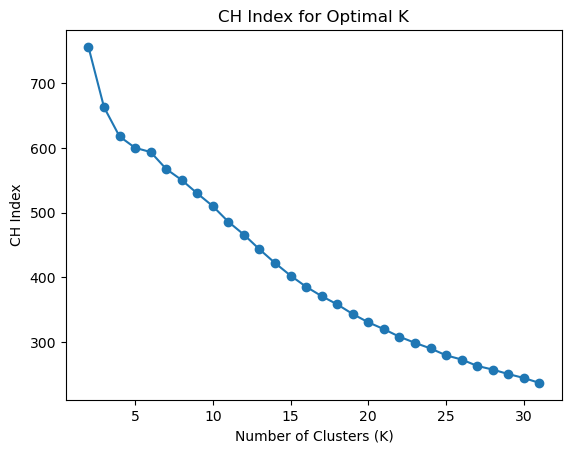

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

# Load the dataset
df = pd.read_csv('social_marketing.csv')
# List of columns to drop

columns_to_drop = ['chatter', 'uncategorized', 'spam', 'adult']

# Drop the specified columns
df = df.drop(columns_to_drop, axis=1)


# Drop the user ID column
interest_columns = df.columns[1:] 

# Preprocess the data
# Select only the columns you want to use for clustering
interest_data = df[interest_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(interest_data)

# Create an array to store CH index values
ch_scores = []

# Range of K values to test
k_range = range(2, 32)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(scaled_data)
    ch_score = calinski_harabasz_score(scaled_data, cluster_labels)
    ch_scores.append(ch_score)

# Plot CH index values against K values
plt.plot(k_range, ch_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('CH Index')
plt.title('CH Index for Optimal K')
plt.show()

CH index looks slightly better than the elbow method and K seems to be in the range around 6-8.

# Hierarchical Clustering Dendrogram

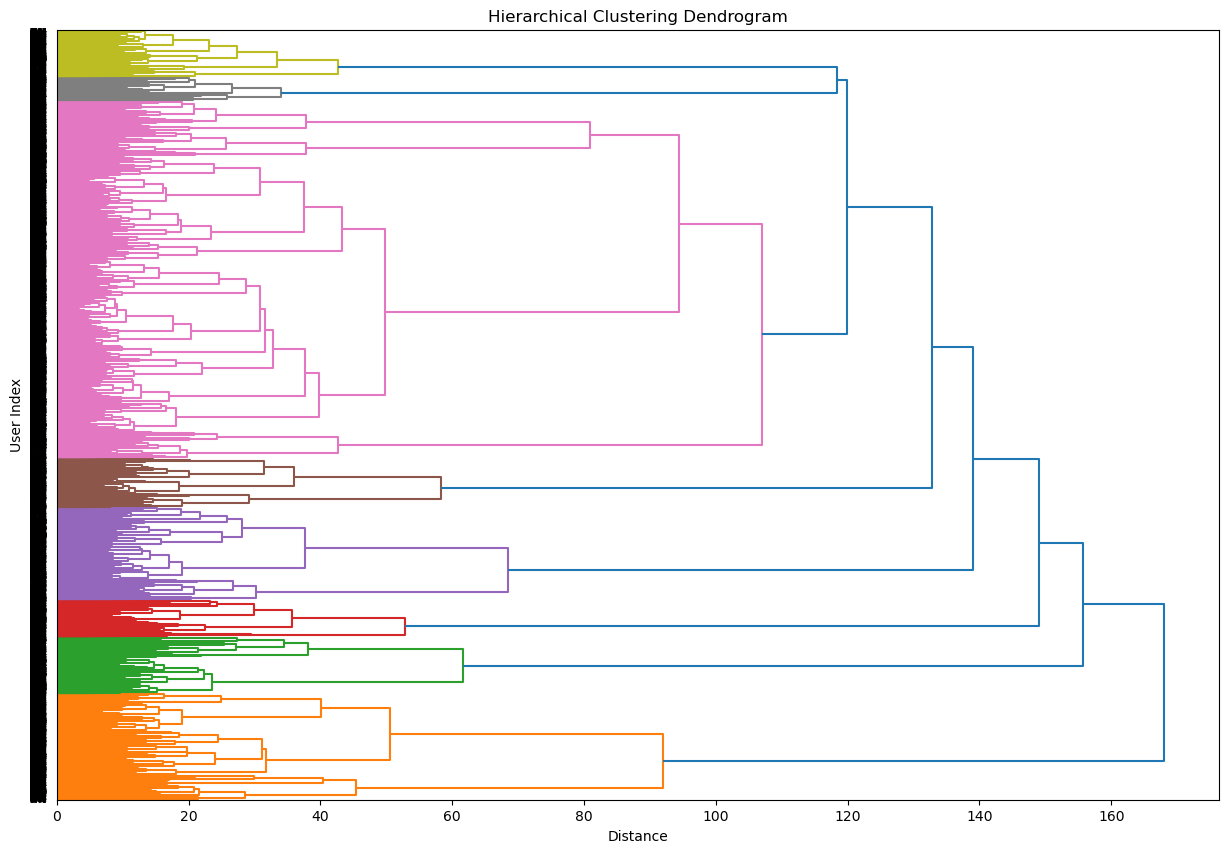

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load the dataset
df = pd.read_csv('social_marketing.csv')

# List of columns to drop
columns_to_drop = ['chatter', 'uncategorized', 'spam', 'adult']

# Drop the specified columns
df = df.drop(columns_to_drop, axis=1)

# Drop the first column (9-digit alphanumeric code)
df = df.drop(df.columns[0], axis=1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Calculate linkage matrix using Ward linkage
linkage_matrix = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, labels=df.index, orientation='right')
plt.xlabel('Distance')
plt.ylabel('User Index')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

Dendrogram above ends up clustering into 8 different groups, so we'll use this as the optimal K.

In [62]:
# Cut the tree into 8 clusters
num_clusters = 8
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Add the cluster labels to the DataFrame
df['cluster'] = cluster_labels

In [63]:
# Calculate cluster statistics
cluster_stats = df.groupby('cluster').mean()

# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Display cluster statistics
print(cluster_stats)

         current_events    travel  photo_sharing   tv_film  sports_fandom  \
cluster                                                                     
1              1.539799  1.344922       2.330284  0.833486       4.720952   
2              1.702422  1.384083       5.453287  0.809689       1.268166   
3              1.663185  8.511749       2.493473  0.908616       1.033943   
4              1.495772  1.080338       2.184989  0.700846       1.078224   
5              1.273810  1.240079       2.525794  1.065476       0.984127   
6              1.511063  1.145862       2.608304  1.010653       0.854411   
7              1.729167  2.516667       2.720833  5.645833       1.329167   
8              1.513627  1.083857       2.222222  0.951782       2.750524   

          politics      food    family  home_and_garden     music      news  \
cluster                                                                       
1         1.298262  3.651418  1.978042         0.564501  0.623971  0.94

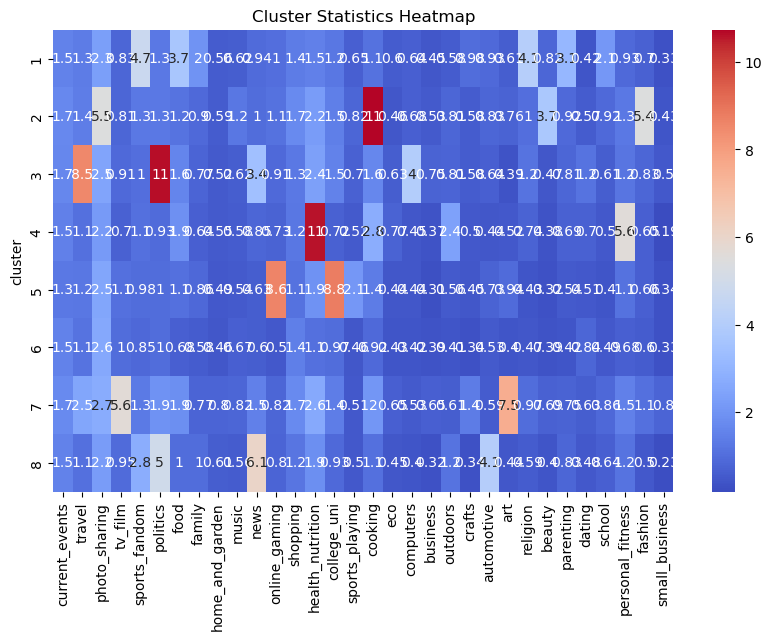

In [64]:
# create a heatmap of the clusters based on the summary means above
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_stats, cmap='coolwarm', annot=True)
plt.title('Cluster Statistics Heatmap')
plt.show()

Based on the summary of means and heatmap above here are some key words/interests that stand out for each cluster relative to the other clusters:
1 sports_fandom, food, family, religion, parenting, school
2 photo sharing, music, cooking, beauty, fashion
3 travel, politics, computers, dating
4 health nutrition, outdoors, personal fitness
5 online_gaming, college_uni, sports_playing
6 nothing :(
7 tv_film, crafts, art
8 news, politics, automotive

Cluster 1 appears to be religious parents with family and kids in school. Their interests include sports and food.
Cluster 2 seems to have a strong interest in creative and self-expression activities such as photo sharing and music. The focus on cooking, beauty, and fashion suggests that this group might be interested in aesthetics, personal style, and creativity.
Cluster 3 is interested in diverse topics. It might represent individuals who are well-informed and engaged in global affairs, politics, and the latest technological advancements. It might also include singles or younger people based on dating.
Cluster 4 seems to consist of health-conscious individuals  interested in physical fitness and outdoor pursuits.
Cluster 5 appears to represent individuals who are more digitally engaged, possibly younger individuals who are interested in gaming and higher education (maybe teenagers and college students). They also seem active, as their mean in sports playing is relatively higher than other groups.
Cluster 6 does not stand out in any category. Maybe this group is like a general public, and they're just average in everything.
Cluster 7 also seems like a creative group, maybe similar to Cluster 2 but with focus on art rather than aesthetics or personal style.
Cluster 8 seems keen on what happening in the news and politics. Their interest in automotive stands out compared to other clusters.